In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_frame=pd.read_csv("multiplegradesdataset.csv")

In [3]:
data_frame.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [5]:
print(data_frame.describe(),"\n\n", data_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB
       Study Hours  Sleep Hours  Attendance Rate  Social Media Hours  \
count     50.00000    50.000000        50.000000            50.00000   
mean       3.66800     7.022000        89.736000             3.09000   
std        1.40123     0.874419         4.924813             0.89699   
min        1.10000     4.400000        80.400000             1.50000   
25%        2.67500     6.500000        85.625000             2.22500   
50%        3.60000     7.050000        90.100000             3.20000   
75%        

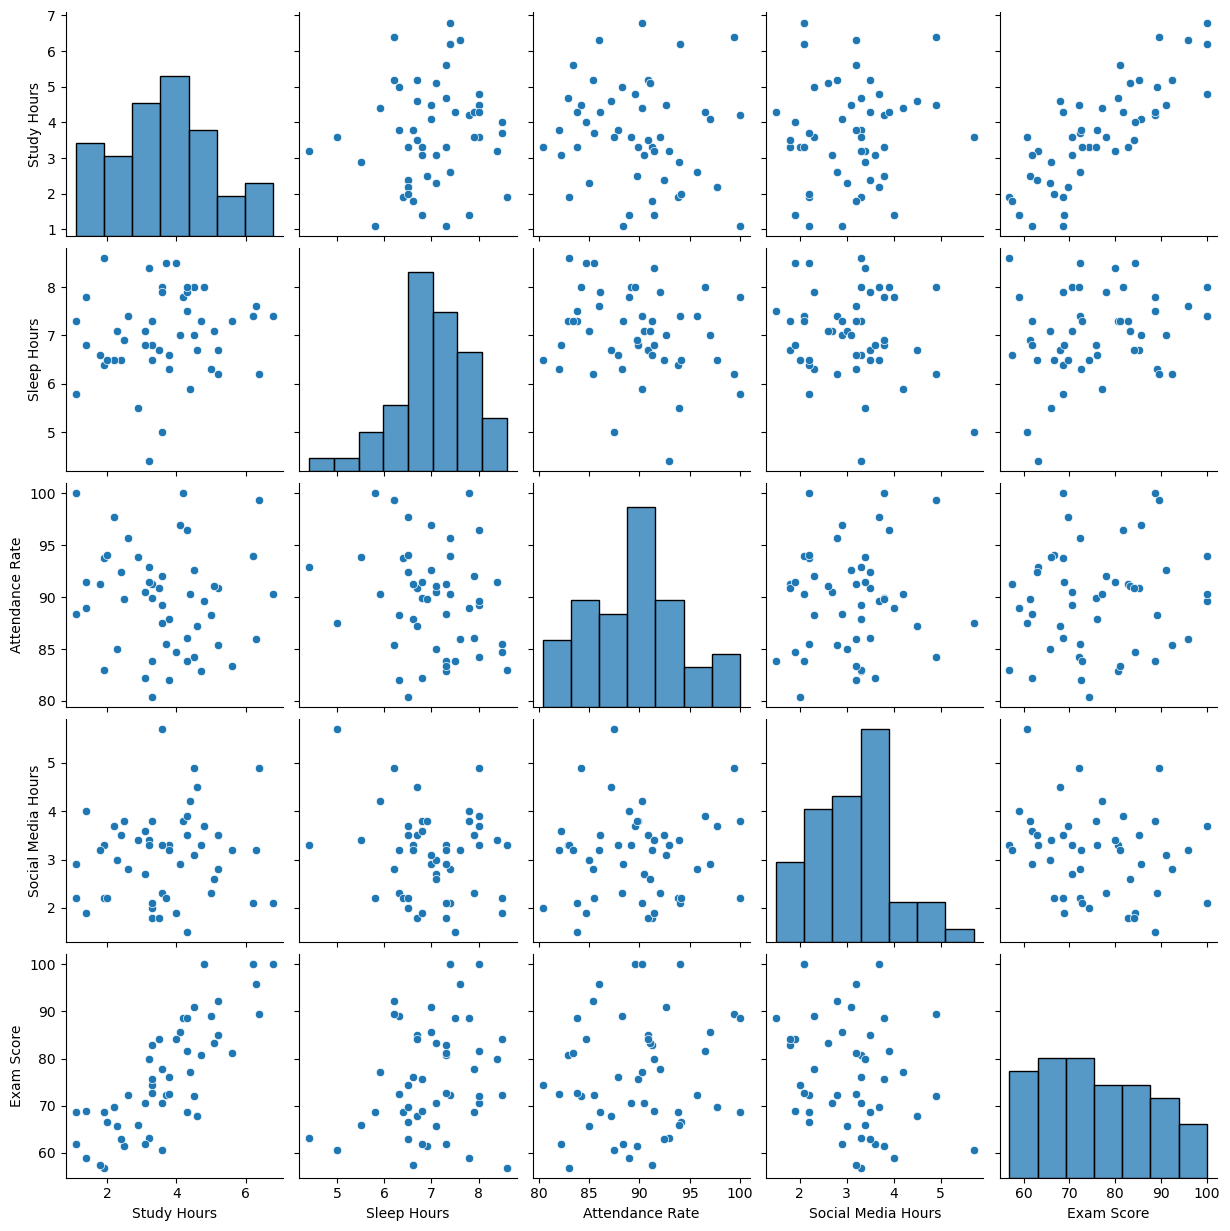

In [6]:
sns.pairplot(data_frame)
plt.show()

### Aslinda iki bagimsiz degisken(column) lar arasi korelasyonun yüksek olmasi iyi bir şey degildir.<br><br>> Diyelim ki bu ornek gibi derse katilim suresi ve normal ders calisma suresi olsun. bu iki bilgi birbiriyle yuksek oranda iliskilidir. Cunku derse daha fazla katilan bir ogrenci, genellikle derse toplamda da daha fazla zaman harcar.<br><br> Modele bu bilgileri verdigimizde sinav notundaki artisin __derse katilim suresinden mi yoksa derse harcanan toplam sureden mi oldugu__ yonunden kafasi karisir<br> Mesela model sinav sonucundaki artisin %90 sebebi derse katilim gibi karisik cevaplar verebilir. <br><br>Siz bir yonetici olarak "Sinav notlarini artirmak icin ögrencilerin derse daha cok katilmasi mi onemli, yoksa toplam ders calisma suresini mi artirmamiz lazim?" diye sordugunuzda, modeliniz net bir cevap veremez

In [7]:
data_frame.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


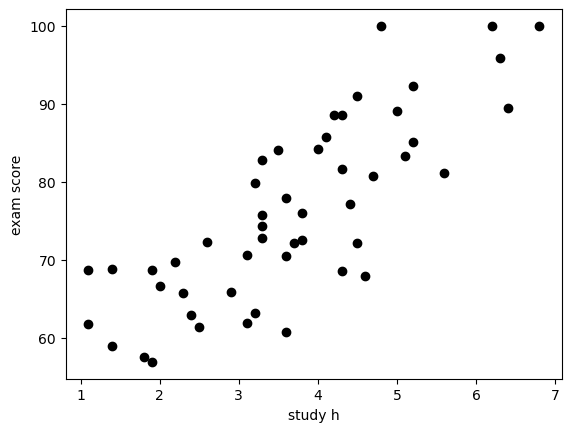

In [8]:
plt.scatter(data_frame["Study Hours"], data_frame["Exam Score"], color="black")
plt.xlabel("study h")
plt.ylabel("exam score")
plt.show()

#### seaborn'un icinde __regplot__ vardir. bu best fit line'i cizmeye calisir bizim icin (regression model fit)

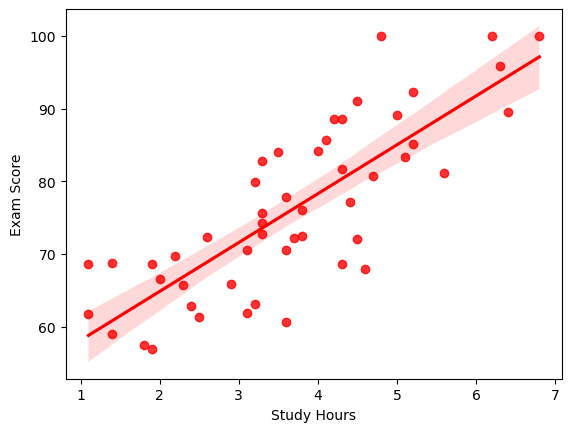

In [9]:
sns.regplot(x=data_frame["Study Hours"], y=data_frame["Exam Score"], color="red")
plt.show()

## dependent-independent 

In [11]:
X=data_frame[["Study Hours","Sleep Hours","Attendance Rate","Social Media Hours"]]
y=data_frame["Exam Score"]

#bazi kaynaklarda Soyle olabilir
#X=data_frame.iloc[:,:-1]
#y=data_frame.iloc[:,-1]
#eger sonuc kismi (exam score) en son column'ddaysa ise yarar

### train-test split

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regresyon =LinearRegression()

In [20]:
regresyon.fit(X_train, y_train)

LinearRegression()

#### simdi yeni ogrenci uzerinde tahmin deneyelim

In [23]:
new_st=[[5, 7, 90, 2]]
new_st_scaled=scaler.transform(new_st) #Burada yaptığımız şey, önceden eğitim verisinden öğrendiğimiz ortalama ve standart sapma değerlerini 
#kullanarak bu ham veriyi dönüştürmek.

C:\for code\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
regresyon.predict(new_st_scaled)

array([90.88471349])

## Prediction

In [26]:
y_tahmin=regresyon.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
mse = mean_squared_error(y_test, y_tahmin)
mae = mean_absolute_error(y_test, y_tahmin)


print("mse: ", mse)
print("mae: ",mae)

mse:  14.600589378986266
mae:  3.2770264859627876


In [29]:
r2score=r2_score(y_test, y_tahmin)
print(r2score)

0.915670734577271


In [31]:
#adjusted r2score
1-(1-r2score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)

0.8735061018659065

### biz residuals (bir regresyon modelindeki tahminin gercek degerden ne kadar saptigini gosteren farktir.) bulmak isteyebiliriz

In [32]:
residuals=y_test - y_tahmin

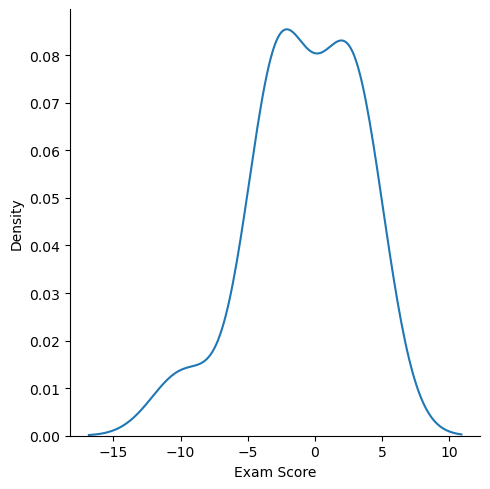

In [33]:
sns.displot(residuals, kind="kde")
plt.show()